<a href="https://colab.research.google.com/github/hamagami/is/blob/main/DimentionReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimension Reduction


In [ ]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10589 sha256=3c2cfc5f8582aa481b464387fa51e031739839fc86dc4f29b440f9d1357722c6
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


## PCA IRIS

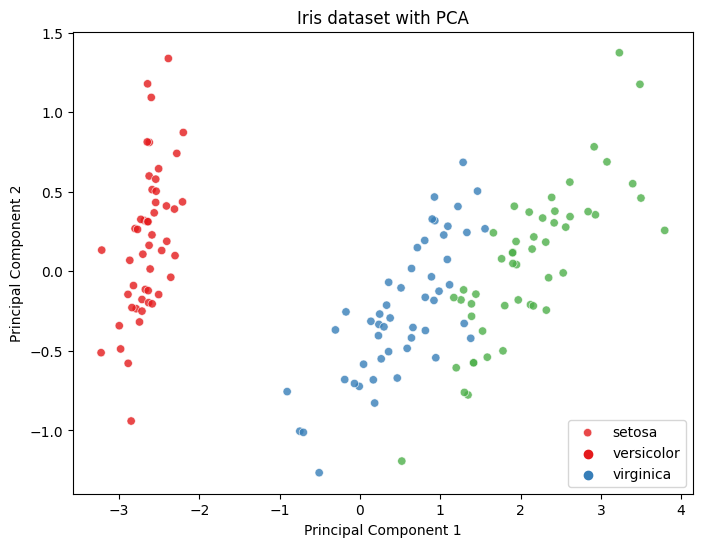

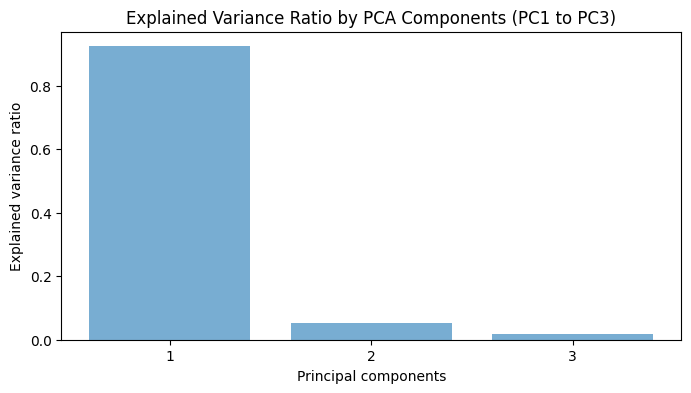

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns

# Read IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# PCAで2次元に次元削減
pca = PCA(n_components=3)
X_r = pca.fit_transform(X)

# DataFrameに変換
df = pd.DataFrame(X_r, columns=['PC1', 'PC2', 'PC3'])
df['target'] = y


# 2次元プロット
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df, palette='Set1', legend='full', alpha=0.8)
plt.title('Iris dataset with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(target_names)
plt.show()

explained_variance_3 = pca.explained_variance_ratio_

# 寄与率のプロット（PC1からPC3まで）
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance_3) + 1), explained_variance_3, alpha=0.6, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by PCA Components (PC1 to PC3)')
plt.xticks([1, 2, 3])
plt.show()


## PCA swiss roll

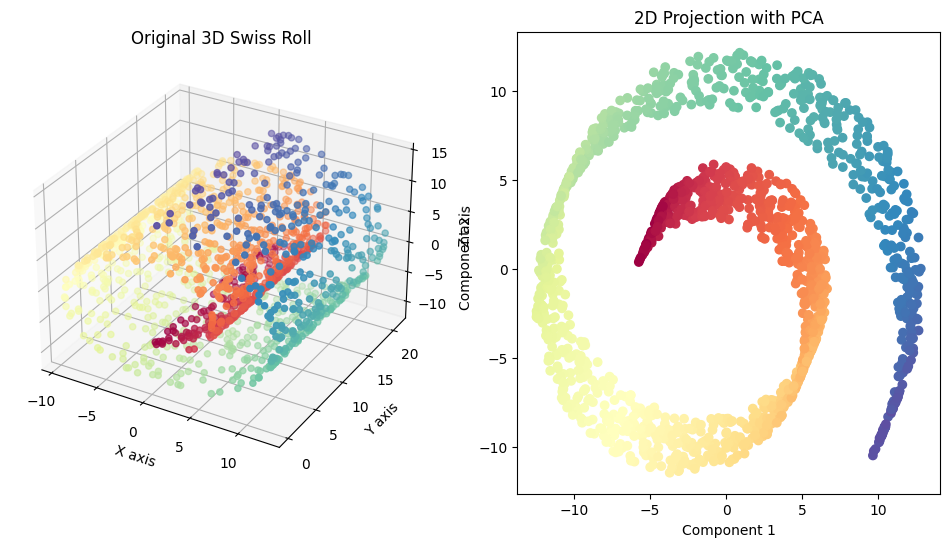

In [ ]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generating 3D Swiss Roll data
n_samples = 1500
noise = 0.05
X, color = make_swiss_roll(n_samples)

# Using PCA for dimensionality reduction from 3D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the original 3D data
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.set_title("Original 3D Swiss Roll")
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Plotting the 2D projection with PCA
ax = fig.add_subplot(122)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap=plt.cm.Spectral)
ax.set_title("2D Projection with PCA")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

plt.show()


# Autoencoder swiss-roll

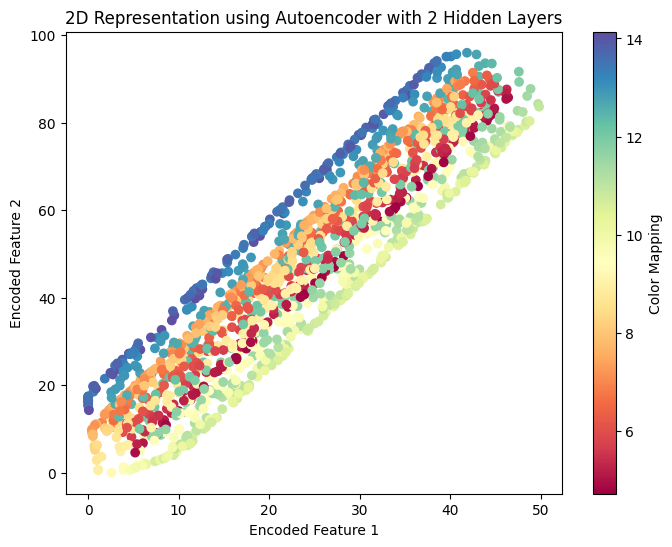

In [ ]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll

# 3次元スイスロールデータの生成
n_samples = 1500
noise = 0.05
X, color = make_swiss_roll(n_samples, noise=noise)

# オートエンコーダの中間層を2層で設定し、トレーニング
autoencoder = MLPRegressor(hidden_layer_sizes=(2, 2),
                           activation='relu',
                           solver='adam',
                           max_iter=10000,
                           random_state=42)
autoencoder.fit(X, X)

# エンコーダ部分を抽出するためのカスタム関数
def extract_encoder(autoencoder_model):
    # 最初の2層（エンコーダ部分）の重みとバイアスを抽出
    encoder_weights = autoencoder_model.coefs_[:2]
    encoder_biases = autoencoder_model.intercepts_[:2]

    # エンコーダモデルの新規作成
    encoder_model = MLPRegressor(hidden_layer_sizes=(2,),
                                 activation='relu',
                                 solver='adam',
                                 max_iter=10000,
                                 random_state=42)

    # エンコーダモデルの重みとバイアスの設定
    encoder_model.coefs_ = encoder_weights
    encoder_model.intercepts_ = encoder_biases
    encoder_model.n_layers_ = len(encoder_weights) + 1
    encoder_model.n_outputs_ = 2
    encoder_model.out_activation_ = 'relu'

    return encoder_model

# トレーニング済みオートエンコーダからエンコーダ部分を抽出
encoder = extract_encoder(autoencoder)

# 3次元データを2次元にエンコード
X_encoded = encoder.predict(X)

# 2次元表現のプロット
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("2D Representation using Autoencoder with 2 Hidden Layers")
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.colorbar(label='Color Mapping')
plt.show()


# VAE swiss-roll

Epoch 1/500
12/12 - 8s - loss: 240.0398 - 8s/epoch - 649ms/step
Epoch 2/500
12/12 - 0s - loss: 216.2635 - 71ms/epoch - 6ms/step
Epoch 3/500
12/12 - 0s - loss: 197.1956 - 70ms/epoch - 6ms/step
Epoch 4/500
12/12 - 0s - loss: 178.9406 - 80ms/epoch - 7ms/step
Epoch 5/500
12/12 - 0s - loss: 160.9031 - 122ms/epoch - 10ms/step
Epoch 6/500
12/12 - 0s - loss: 144.8975 - 68ms/epoch - 6ms/step
Epoch 7/500
12/12 - 0s - loss: 130.9263 - 77ms/epoch - 6ms/step
Epoch 8/500
12/12 - 0s - loss: 123.5525 - 75ms/epoch - 6ms/step
Epoch 9/500
12/12 - 0s - loss: 114.2881 - 85ms/epoch - 7ms/step
Epoch 10/500
12/12 - 0s - loss: 108.7975 - 75ms/epoch - 6ms/step
Epoch 11/500
12/12 - 0s - loss: 103.5771 - 69ms/epoch - 6ms/step
Epoch 12/500
12/12 - 0s - loss: 103.0526 - 66ms/epoch - 6ms/step
Epoch 13/500
12/12 - 0s - loss: 97.4010 - 66ms/epoch - 6ms/step
Epoch 14/500
12/12 - 0s - loss: 93.4263 - 96ms/epoch - 8ms/step
Epoch 15/500
12/12 - 0s - loss: 93.8757 - 101ms/epoch - 8ms/step
Epoch 16/500
12/12 - 0s - loss: 92

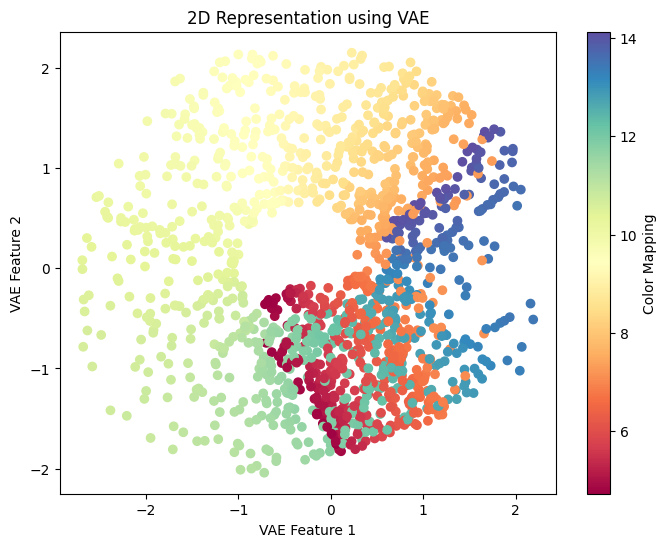

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import mse
from sklearn.datasets import make_swiss_roll

# 3次元スイスロールデータの生成
n_samples = 1500
noise = 0.05
X, color = make_swiss_roll(n_samples, noise=noise)

# VAEのパラメータ
input_dim = 3
latent_dim = 2
intermediate_dim = 64
batch_size = 128
epochs = 500

# エンコーダネットワーク
inputs = Input(shape=(input_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

# 潜在変数のサンプリング関数
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

# デコーダネットワーク
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(input_dim)
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAEモデル
vae = Model(inputs, x_decoded_mean)

# VAEの損失関数
reconstruction_loss = mse(inputs, x_decoded_mean)
reconstruction_loss *= input_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.fit(X, epochs=epochs, batch_size=batch_size, verbose=2)

# エンコーダモデルの構築
encoder = Model(inputs, z_mean)

# 3次元データを2次元に圧縮
X_encoded = encoder.predict(X, batch_size=batch_size)

# 2次元表現のプロット
plt.figure(figsize=(8, 6))
plt.scatter(X_encoded[:, 0], X_encoded[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("2D Representation using VAE")
plt.xlabel('VAE Feature 1')
plt.ylabel('VAE Feature 2')
plt.colorbar(label='Color Mapping')
plt.show()




# t-SNE MIST

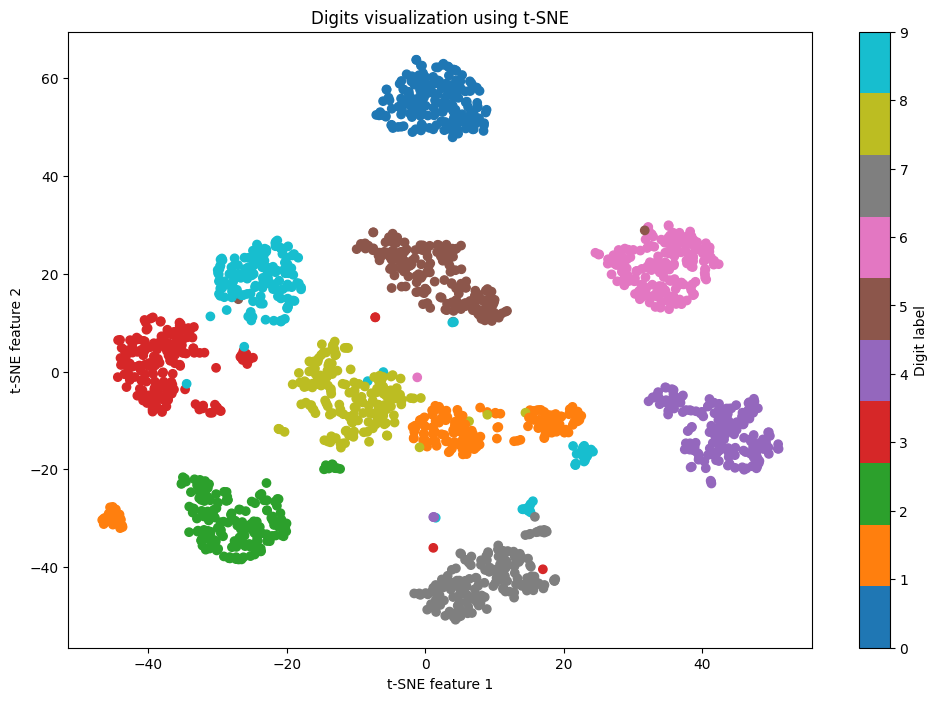

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# MNISTの縮小版データセットをロード
digits = load_digits()
X = digits.data
y = digits.target

# t-SNEによる次元削減
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# t-SNEによる埋め込みをプロット
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10')
plt.colorbar(label='Digit label')
plt.title('Digits visualization using t-SNE')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

# t-SNE by iris dataset

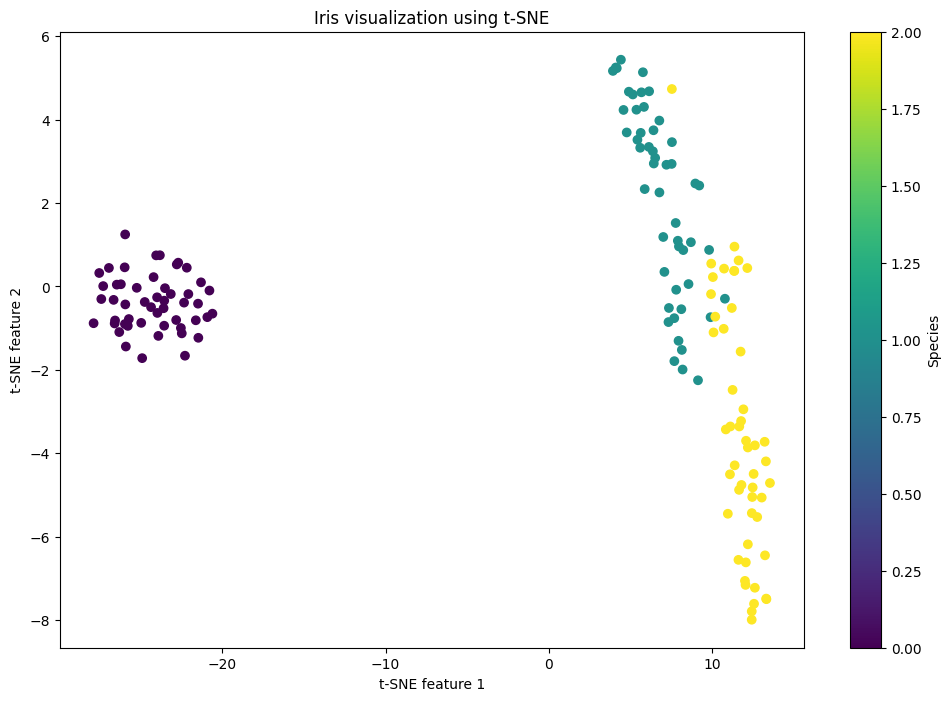

In [ ]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# アヤメ(Iris)のデータセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# t-SNEによる次元削減
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# t-SNEによる埋め込みをプロット
plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Species')
plt.title('Iris visualization using t-SNE')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


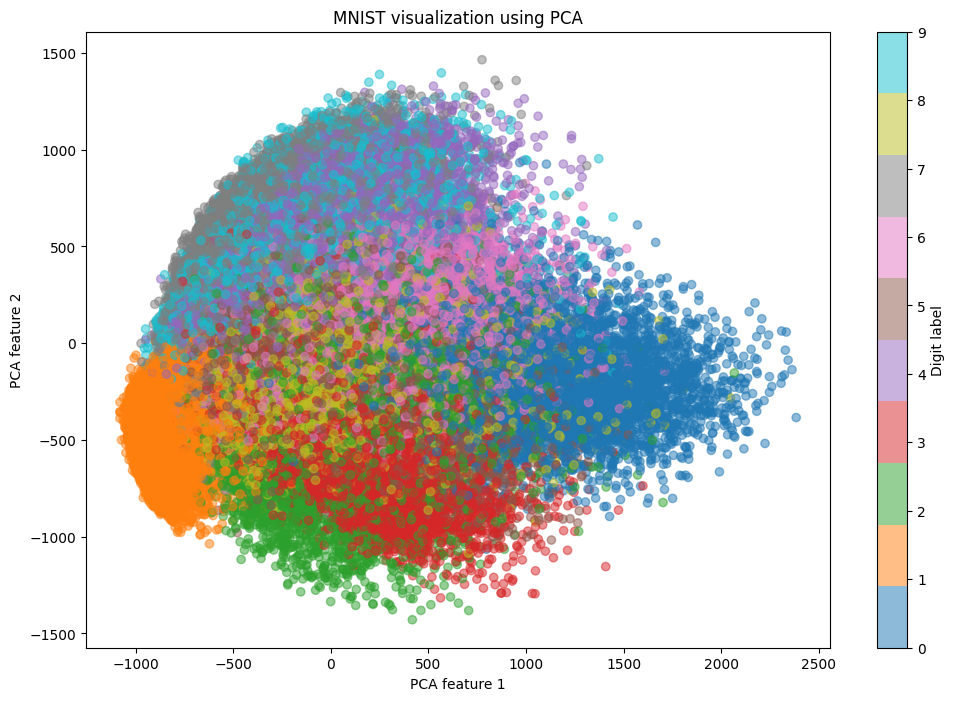

In [ ]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# MNISTデータセットをロード
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data
y = mnist.target

# PCAによる次元削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCAによる埋め込みをプロット
plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y.astype(int), cmap='tab10', alpha=0.5)
plt.colorbar(label='Digit label')
plt.title('MNIST visualization using PCA')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.show()


# IRIS PCA, NMF, AutoEndoder, t-SNE

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


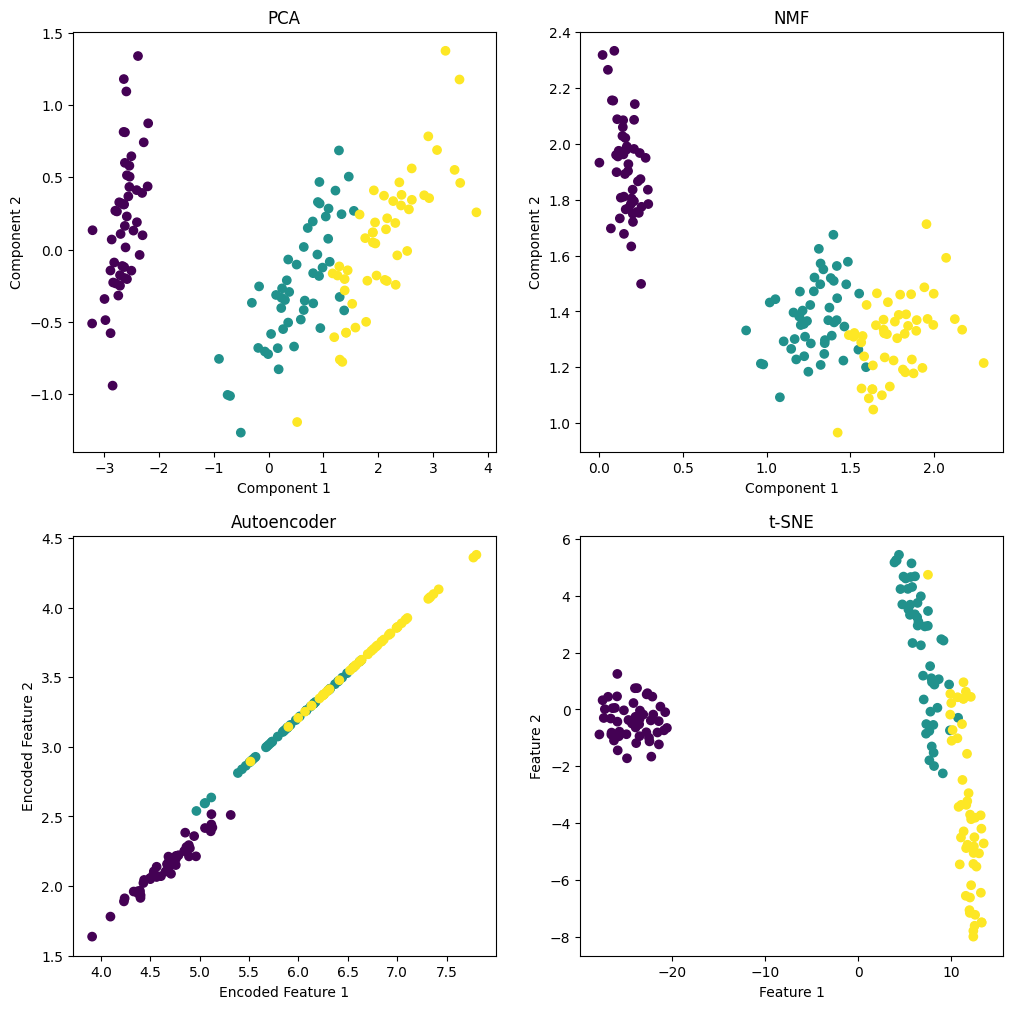

In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

# アヤメ(Iris)データセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# PCAによる次元削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# NMFによる次元削減
nmf = NMF(n_components=2, init='random', random_state=0)
X_nmf = nmf.fit_transform(X)

# オートエンコーダによる次元削減
autoencoder = MLPRegressor(hidden_layer_sizes=(2,),
                           activation='relu',
                           solver='adam',
                           max_iter=2000,
                           random_state=42)
autoencoder.fit(X, X)
X_encoded = autoencoder.predict(X)

# t-SNEによる次元削減
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 可視化
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# PCAの結果をプロット
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
axs[0, 0].set_title('PCA')
axs[0, 0].set_xlabel('Component 1')
axs[0, 0].set_ylabel('Component 2')

# NMFの結果をプロット
axs[0, 1].scatter(X_nmf[:, 0], X_nmf[:, 1], c=y, cmap='viridis')
axs[0, 1].set_title('NMF')
axs[0, 1].set_xlabel('Component 1')
axs[0, 1].set_ylabel('Component 2')

# オートエンコーダの結果をプロット
axs[1, 0].scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='viridis')
axs[1, 0].set_title('Autoencoder')
axs[1, 0].set_xlabel('Encoded Feature 1')
axs[1, 0].set_ylabel('Encoded Feature 2')

# t-SNEの結果をプロット
axs[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
axs[1, 1].set_title('t-SNE')
axs[1, 1].set_xlabel('Feature 1')
axs[1, 1].set_ylabel('Feature 2')

plt.show()


# MNIST: PCA, NMF, AutoEncoder,t-SNE

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


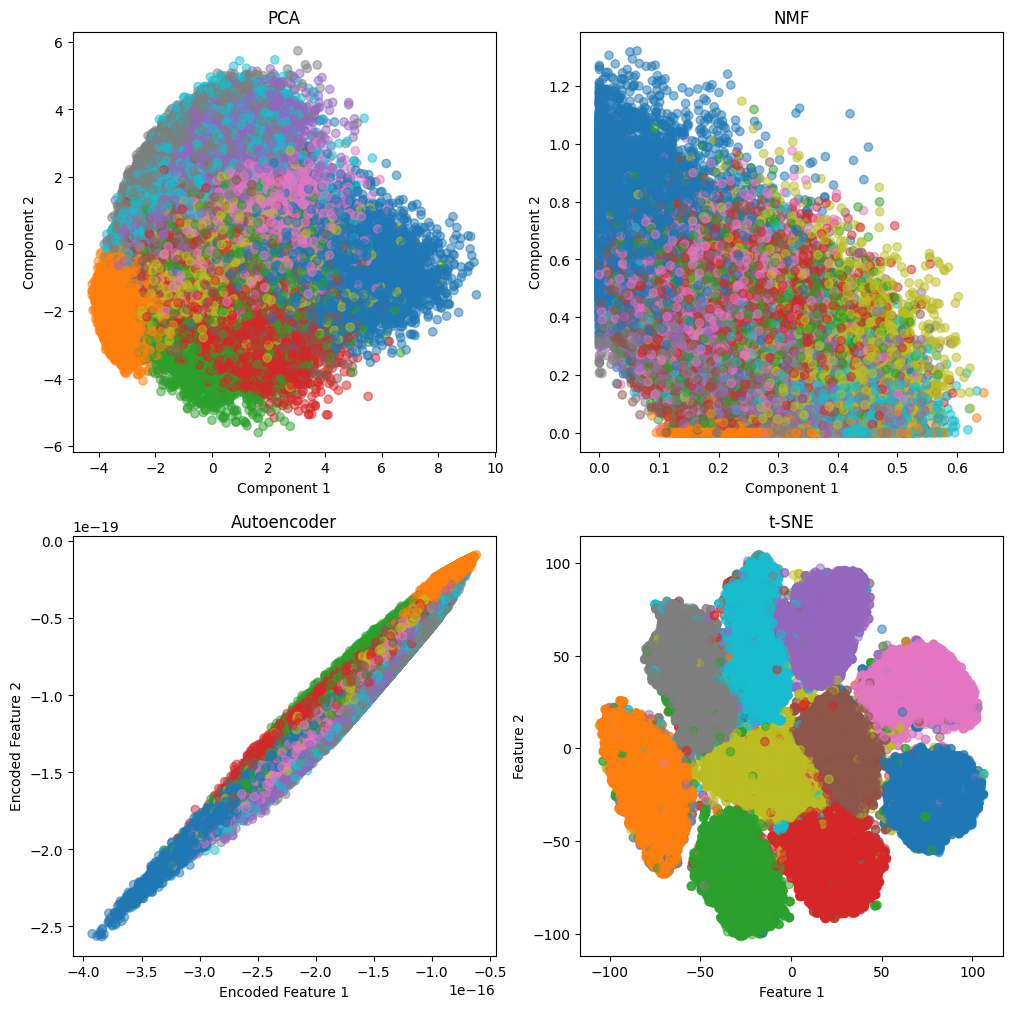

In [ ]:
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt

# MNISTデータセットをロード（インターネット接続が必要）
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data / 255.0  # ピクセル値の正規化
y = mnist.target.astype(int)

# PCAによる次元削減
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# NMFによる次元削減
nmf = NMF(n_components=2, init='random', random_state=0)
X_nmf = nmf.fit_transform(X)

# オートエンコーダによる次元削減
autoencoder = MLPRegressor(hidden_layer_sizes=(2,),
                           activation='relu',
                           solver='adam',
                           max_iter=2000,
                           random_state=42)
autoencoder.fit(X, X)
X_encoded = autoencoder.predict(X)

# t-SNEによる次元削減
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 可視化
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# PCAの結果をプロット
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5)
axs[0, 0].set_title('PCA')
axs[0, 0].set_xlabel('Component 1')
axs[0, 0].set_ylabel('Component 2')

# NMFの結果をプロット
axs[0, 1].scatter(X_nmf[:, 0], X_nmf[:, 1], c=y, cmap='tab10', alpha=0.5)
axs[0, 1].set_title('NMF')
axs[0, 1].set_xlabel('Component 1')
axs[0, 1].set_ylabel('Component 2')

# オートエンコーダの結果をプロット
axs[1, 0].scatter(X_encoded[:, 0], X_encoded[:, 1], c=y, cmap='tab10', alpha=0.5)
axs[1, 0].set_title('Autoencoder')
axs[1, 0].set_xlabel('Encoded Feature 1')
axs[1, 0].set_ylabel('Encoded Feature 2')

# t-SNEの結果をプロット
axs[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.5)
axs[1, 1].set_title('t-SNE')
axs[1, 1].set_xlabel('Feature 1')
axs[1, 1].set_ylabel('Feature 2')

plt.show()



# IRIS, SOM

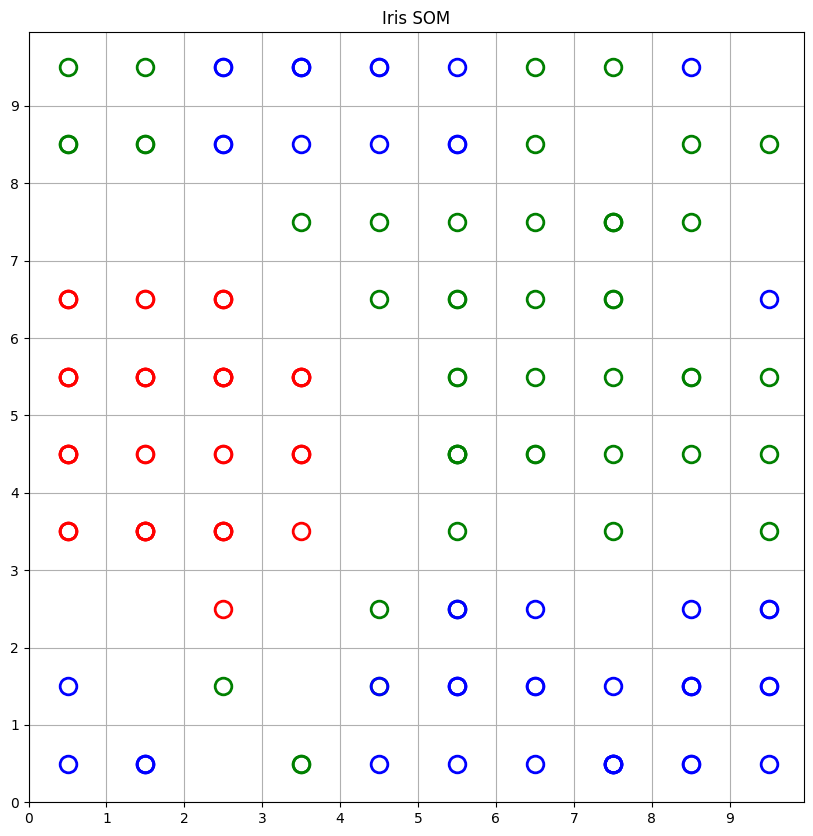

In [ ]:
from minisom import MiniSom
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# アヤメ(Iris)データセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# SOM（Self-Organizing Map）の初期化
som = MiniSom(x=10, y=10, input_len=4, sigma=1.0, learning_rate=0.5)

# SOMの訓練
som.random_weights_init(X)
som.train_random(X, num_iteration=3000)

# 各ニューロンの勝者ノードをプロット
plt.figure(figsize=(10, 10))
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, 'o', markerfacecolor='None',
             markeredgecolor='r' if y[i] == 0 else 'g' if y[i] == 1 else 'b',
             markersize=12, markeredgewidth=2)
plt.title('Iris SOM')
plt.xticks(range(10))
plt.yticks(range(10))
plt.grid()
plt.show()


# MNIST SOM

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


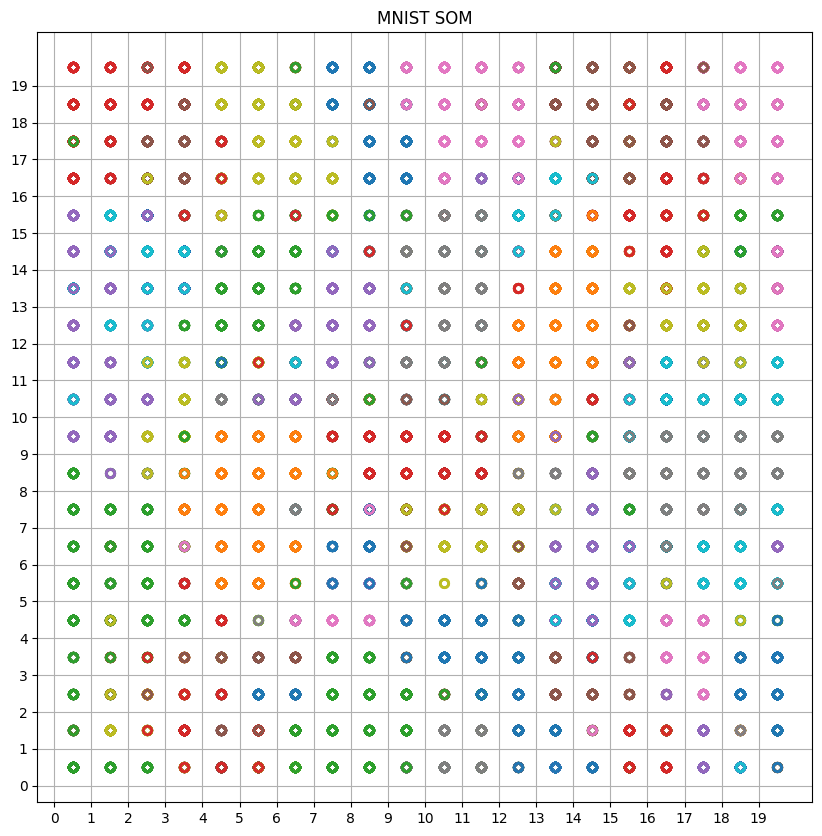

In [ ]:
# 必要なライブラリをインポート
from minisom import MiniSom
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# MNISTデータセットをロード（インターネット接続が必要）
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data / 255.0  # ピクセル値の正規化
y = mnist.target
# SOMの初期化（グリッドサイズやパラメータは調整が必要かもしれません）
som = MiniSom(x=20, y=20, input_len=784, sigma=1.0, learning_rate=0.5)

# SOMの訓練
som.random_weights_init(X)
som.train_random(X, num_iteration=5000)

# 結果の可視化
plt.figure(figsize=(10, 10))
for i, x in enumerate(X):
    w = som.winner(x)
    plt.plot(w[0]+0.5, w[1]+0.5, 'o', markerfacecolor='None',
             markeredgecolor='C' + y[i],
             markersize=6, markeredgewidth=2)
plt.title('MNIST SOM')
plt.xticks(range(20))
plt.yticks(range(20))
plt.grid()
plt.show()
